In [3]:
import numpy as np
import pandas as pd

In [1]:
#testing it
tmp = pd.DataFrame([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print(tmp)
print(tmp_cubed)

NameError: name 'pd' is not defined

In [5]:
def polynomial_df(feature, degree):
    #initialize an empty dataframe
    poly_df = pd.DataFrame()
    poly_df['power_1'] = feature.values.tolist() #clumn power_1 contains feature values
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            poly_df[name] = feature.apply(lambda x: x**power)
    return poly_df

In [6]:
polynomial_df(tmp,3)

,power_1,power_2,power_3
0,[1.0],1.0,1.0
1,[2.0],4.0,8.0
2,[3.0],9.0,27.0


In [7]:
data_train = pd.read_csv("D:/self study/python notes/New folder/kc_house_train_data.csv")
data_train = data_train.astype({'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [8]:
x = data_train['sqft_living']
y = data_train['price']

In [9]:
import statsmodels.api as sm

C:\Users\king\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.698e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:55:52   Log-Likelihood:            -2.4161e+05
No. Observations:               17384   AIC:                         4.832e+05
Df Residuals:                   17382   BIC:                         4.832e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.712e+04   4923.344     -9.570      0.000   -5.68e+04   -3.75e+04
sqft_living   281.9588      2.164    130.292      0.000     277.717     286.201
==============================================================================
Omnibus:                    11826.248   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416980.854
Skew:                           2.799   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
y_predict = model.predict(x)

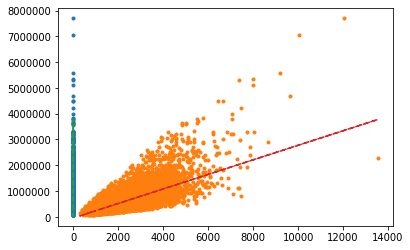

In [14]:
plt.plot(x,y,'.',
        x,y_predict,'--')

In [15]:
feature = data_train['sqft_living']
poly_data = polynomial_df(feature, 1)
poly_data['price'] = data_train['price'] 

In [16]:
x = poly_data['power_1']
y = poly_data['price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.698e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:55:55   Log-Likelihood:            -2.4161e+05
No. Observations:               17384   AIC:                         4.832e+05
Df Residuals:                   17382   BIC:                         4.832e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.712e+04   4923.344     -9.570      0.000   -5.68e+04   -3.75e+04
power_1      281.9588      2.164    130.292      0.000     277.717     286.201
==============================================================================
Omnibus:                    11826.248   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416980.854
Skew:                           2.799   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y_predict = model.predict(x)

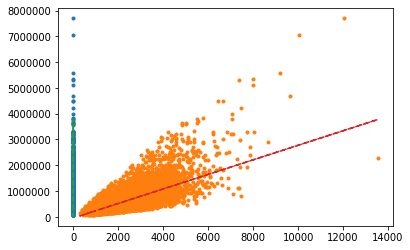

In [18]:
plt.plot(x,y,'.',
        x,y_predict,'--')

In [19]:
feature = data_train['sqft_living']
poly2_data = polynomial_df(feature, 2)
poly2_data['price'] = data_train['price'] 
poly2_data.head()

,power_1,power_2,price
0,1180.0,1392400.0,221900.0
1,2570.0,6604900.0,538000.0
2,770.0,592900.0,180000.0
3,1960.0,3841600.0,604000.0
4,1680.0,2822400.0,510000.0


In [20]:
x = poly2_data[['power_1', 'power_2']]
y = poly2_data['price']
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     9956.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:55:56   Log-Likelihood:            -2.4090e+05
No. Observations:               17384   AIC:                         4.818e+05
Df Residuals:                   17381   BIC:                         4.818e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.925e+05   7807.199     24.651      0.000    1.77e+05    2.08e+05
power_1       73.4699      5.794     12.681      0.000      62.114      84.826
power_2        0.0375      0.001     38.549      0.000       0.036       0.039
==============================================================================
Omnibus:                     7650.837   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           564852.163
Skew:                           1.253   Prob(JB):                         0.00
Kurtosis:                      30.813   Cond. No.                     3.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

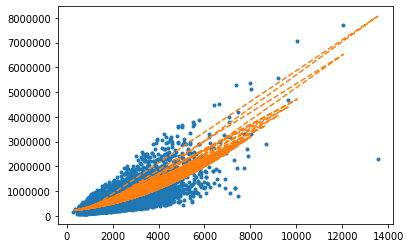

In [21]:
y_predict = model2.predict(x)
plt.plot(poly2_data['power_1'],y,'.',
        poly2_data['power_1'],y_predict,'--')

In [22]:
feature = data_train['sqft_living']
poly15_data = polynomial_df(feature, 15)
poly15_data['price'] = data_train['price']

In [23]:
x = poly15_data.drop('price', axis = 1)
y = poly2_data.iloc[:,-1]
x = sm.add_constant(x)
model15 = sm.OLS(y,x).fit()
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -2.009
Model:                            OLS   Adj. R-squared:                 -2.009
Method:                 Least Squares   F-statistic:                    -5802.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               1.00
Time:                        11:55:58   Log-Likelihood:            -2.5711e+05
No. Observations:               17384   AIC:                         5.142e+05
Df Residuals:                   17381   BIC:                         5.143e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.039e-94   5.02e-96     20.709      0.000    9.41e-95    1.14e-94
power_1    -3.424e-50   1.65e-51    -20.709      0.000   -3.75e-50    -3.1e-50
power_2     1.108e-55   5.35e-57     20.709      0.000       1e-55    1.21e-55
power_3    -2.201e-60   1.06e-61    -20.709      0.000   -2.41e-60   -1.99e-60
power_4     7.768e-78   3.75e-79     20.709      0.000    7.03e-78     8.5e-78
power_5     4.096e-75   1.98e-76     20.709      0.000    3.71e-75    4.48e-75
power_6     3.456e-71   1.67e-72     20.709      0.000    3.13e-71    3.78e-71
power_7      2.88e-67   1.39e-68     20.709      0.000    2.61e-67    3.15e-67
power_8     2.347e-63   1.13e-64     20.709      0.000    2.13e-63    2.57e-63
power_9     1.844e-59    8.9e-61     20.709      0.000    1.67e-59    2.02e-59
power_10    1.367e-55    6.6e-57     20.709      0.000    1.24e-55     1.5e-55
power_11    9.204e-52   4.44e-53     20.709      0.000    8.33e-52    1.01e-51
power_12    5.211e-48   2.52e-49     20.709      0.000    4.72e-48     5.7e-48
power_13    1.983e-44   9.57e-46     20.709      0.000    1.79e-44    2.17e-44
power_14   -3.065e-48   1.51e-49    -20.277      0.000   -3.36e-48   -2.77e-48
power_15    1.183e-52   5.95e-54     19.888      0.000    1.07e-52     1.3e-52
==============================================================================
Omnibus:                    11673.942   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           245879.480
Skew:                           2.937   Prob(JB):                         0.00
Kurtosis:                      20.463   Cond. No.                     1.15e+63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+63. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

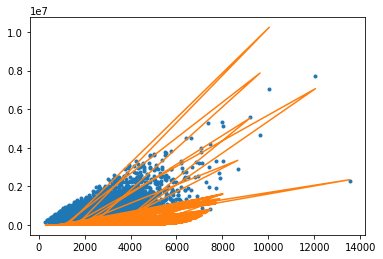

In [24]:
y_predict = model15.predict(x)
plt.plot(poly15_data['power_1'],y,'.',
        poly15_data['power_1'],y_predict,'-')

In [25]:
set_1 = pd.read_csv(r"D:\self study\python notes\New folder\wk3_kc_house_set_1_data.csv")
set_1 = set_1.astype({'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set_1 = set_1[['sqft_living','price']]
set_1 = set_1.sort_values(['sqft_living','price'], axis = 0)

In [26]:
set_2 = pd.read_csv(r"D:\self study\python notes\New folder\wk3_kc_house_set_2_data.csv")
set_2 = set_2.astype({'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set_2 = set_2[['sqft_living','price']]
set_2 = set_2.sort_values(['sqft_living','price'], axis = 0)

In [27]:
set_3 = pd.read_csv(r"D:\self study\python notes\New folder\wk3_kc_house_set_3_data.csv")
set_3 = set_3.astype({'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set_3 = set_1[['sqft_living','price']]
set_3 = set_3.sort_values(['sqft_living','price'], axis = 0)

In [28]:
set_4 = pd.read_csv(r"D:\self study\python notes\New folder\wk3_kc_house_set_4_data.csv")
set_4 = set_4.astype({'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set_4 = set_4[['sqft_living','price']]
set_4 = set_4.sort_values(['sqft_living','price'], axis = 0)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                      -1.734
Model:                            OLS   Adj. R-squared:                 -1.735
Method:                 Least Squares   F-statistic:                    -1713.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               1.00
Time:                        11:55:59   Log-Likelihood:                -79975.
No. Observations:                5404   AIC:                         1.600e+05
Df Residuals:                    5401   BIC:                         1.600e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.998e-94   4.33e-95     16.163      0.0

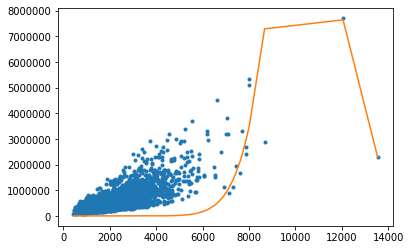

In [29]:
feature = set_1['sqft_living']
set_1p = polynomial_df(feature, 15)
set_1p['price'] = set_1['price']
x = set_1p.drop('price', axis = 1)
y = set_1p.iloc[:,-1]
x = sm.add_constant(x)
model_1 = sm.OLS(y,x).fit()
print(model_1.summary())
y_predict = model_1.predict(x)
plt.plot(set_1p['power_1'],y,'.',
        set_1p['power_1'],y_predict,'-')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                      -2.111
Model:                            OLS   Adj. R-squared:                 -2.112
Method:                 Least Squares   F-statistic:                    -1830.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               1.00
Time:                        11:56:00   Log-Likelihood:                -79569.
No. Observations:                5398   AIC:                         1.591e+05
Df Residuals:                    5395   BIC:                         1.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.518e-90   1.88e-91     18.760      0.0

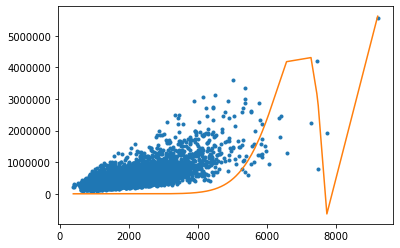

In [30]:
feature = set_2['sqft_living']
set_2p = polynomial_df(feature, 15)
set_2p['price'] = set_2['price']
x = set_2p.drop('price', axis = 1)
y = set_2p.iloc[:,-1]
x = sm.add_constant(x)
model_2 = sm.OLS(y,x).fit()
print(model_2.summary())
y_predict = model_2.predict(x)
plt.plot(set_2p['power_1'],y,'.',
        set_2p['power_1'],y_predict,'-')

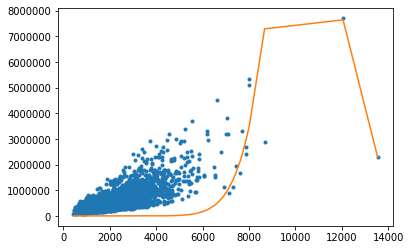

In [31]:
feature = set_3['sqft_living']
set_3p = polynomial_df(feature, 15)
set_3p['price'] = set_3['price']
x = set_3p.drop('price', axis = 1)
y = set_3p.iloc[:,-1]
x = sm.add_constant(x)
model_3 = sm.OLS(y,x).fit()
model_3.summary()
y_predict = model_3.predict(x)
plt.plot(set_3p['power_1'],y,'.',
        set_3p['power_1'],y_predict,'-')

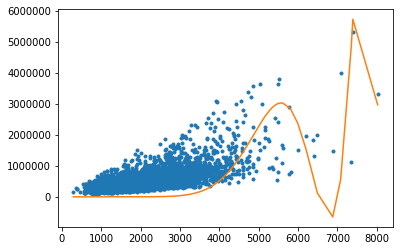

In [32]:
feature = set_4['sqft_living']
set_4p = polynomial_df(feature, 15)
set_4p['price'] = set_4['price']
x = set_4p.drop('price', axis = 1)
y = set_4p.iloc[:,-1]
x = sm.add_constant(x)
model_4 = sm.OLS(y,x).fit()
model_4.summary()
y_predict = model_4.predict(x)
plt.plot(set_4p['power_1'],y,'.',
        set_4p['power_1'],y_predict,'-')

In [33]:
np.shape(data_train)

(17384, 21)

In [34]:
data_train = pd.read_csv(r"D:\self study\python notes\New folder\wk3_kc_house_train_data.csv")
data_train = data_train.astype({'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [48]:
#computing rss
def rss_compute_degree(degree, train_data, valid_data, rss_array):
    rss_array = []
    for power in range(1, degree+1):
        rss = 0
        poly_data = polynomial_df(train_data['sqft_living'], power)
        poly_data['price'] = train_data['price']
        x = poly_data.drop('price', axis = 1)
        y = poly_data.iloc[:,-1]
        x = sm.add_constant(x)
        model= sm.OLS(y,x).fit()
        poly_validata = polynomial_df(valid_data['sqft_living'], power)
        x_ = poly_validata
        x_ = sm.add_constant(x_)
        prediction = model.predict(x_)
        rss_error = prediction - valid_data['price']
        sq_rss = rss_error * rss_error
        rss = sq_rss.sum()
        rss_array.append(rss)
    return rss_array

In [49]:
data_valid = pd.read_csv(r"D:\self study\python notes\New folder\wk3_kc_house_valid_data.csv")
data_valid = data_train.astype({'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [50]:
rss_array = []
answer = rss_compute_degree(15, data_train, data_valid, rss_array)

In [53]:
print(min(answer))

617670141211080.6


AttributeError: 'numpy.float64' object has no attribute 'index'